<a href="https://colab.research.google.com/github/GitMarco27/TMML/blob/main/Notebooks/007_Airfoil_Self_Noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3 Minutes Machine Learning
## Episode 5: Energy Efficiency Data Set 

#### Marco Sanguineti, 2021
---
Welcome to 3 minutes Machine Learning!

Reference: https://archive.ics.uci.edu/ml/datasets/energy+efficiency

In [36]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [37]:
print(tf.__version__)

2.5.0


In [38]:
def loadThumb(path):
  # Let's import this video thumbnail!
  myThumb = plt.imread(path)
  fig, ax = plt.subplots(figsize=(15, 10))
  plt.axis('off')
  ax.imshow(myThumb)
  plt.show()

# loadThumb('/tmp/yt_thumb_005.png')


#### Video Topics
> 1. Load the dataset from UCI.edu
> 2. Create a model with the keras API
> 3. Train the model and check the results
> 4. See you on next video! 

# Load the dataset
___

In [39]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat"
cols = ['Frequency',
        'Angle of Attack',
        'Chord length',
        'Free-stream velocity',
        'Suction side displacement thickness',
        'Sound Pressure']
dataset = pd.read_table(URL, names=cols, dtype='float32')
dataset

,Frequency,Angle of Attack,Chord length,Free-stream velocity,Suction side displacement thickness,Sound Pressure
0,800.0,0.0,0.3048,71.300003,0.002663,126.200996
1,1000.0,0.0,0.3048,71.300003,0.002663,125.200996
2,1250.0,0.0,0.3048,71.300003,0.002663,125.950996
3,1600.0,0.0,0.3048,71.300003,0.002663,127.591003
4,2000.0,0.0,0.3048,71.300003,0.002663,127.460999
...,...,...,...,...,...,...
1498,2500.0,15.6,0.1016,39.599998,0.052849,110.264000
1499,3150.0,15.6,0.1016,39.599998,0.052849,109.253998
1500,4000.0,15.6,0.1016,39.599998,0.052849,106.603996
1501,5000.0,15.6,0.1016,39.599998,0.052849,106.223999


In [40]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Frequency,1503.0,2886.380615,3152.577637,200.000000,800.000000,1600.000000,4000.000000,20000.000000
Angle of Attack,1503.0,6.782283,5.918133,0.000000,2.000000,5.400000,9.900000,22.200001
Chord length,1503.0,0.136548,0.093541,0.025400,0.050800,0.101600,0.228600,0.304800
Free-stream velocity,1503.0,50.861012,15.572801,31.700001,39.599998,39.599998,71.300003,71.300003
Suction side displacement thickness,1503.0,0.011140,0.013150,0.000401,0.002535,0.004957,0.015576,0.058411
Sound Pressure,1503.0,124.835930,6.898657,103.379997,120.191002,125.721001,129.995499,140.987000


In [41]:
# sns.pairplot(dataset)
# plt.show()

# Create the model
___

In [42]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [43]:
input_data = Input(shape=(5), name='Input')
dense1 = Dense(256, activation=tf.nn.relu)(input_data)
drop1 = tf.keras.layers.Dropout(0)(dense1)
dense2 = Dense(256, activation=tf.nn.relu)(drop1)
drop2 = tf.keras.layers.Dropout(0)(dense2)
output = Dense(1, name='output')(drop2)

model = Model(input_data, output)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae', 'mse', 'accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 5)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               1536      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 257       
Total params: 67,585
Trainable params: 67,585
Non-trainable params: 0
_______________________________________________________

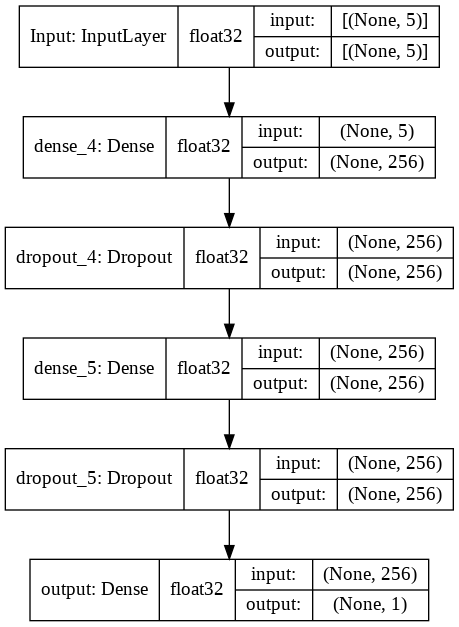

In [44]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=True,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

In [45]:
def separate(df):
  return df[['Sound Pressure']].to_numpy(), df.drop(df[['Sound Pressure']], axis=1).to_numpy()

In [46]:
min_max_scaler = preprocessing.MinMaxScaler()
df_normed = pd.DataFrame(min_max_scaler.fit_transform(dataset))
df_normed.columns = list(dataset.columns)
train_set, test_set = train_test_split(df_normed)
train_labels, train_features = separate(train_set)
test_labels, test_features = separate(test_set)

# Train and check the results
___

In [47]:
history = model.fit(
    train_features,
    train_labels,
    batch_size = 32,
    epochs=1000,
    validation_data=(test_features,
                     test_labels)
)

Epoch 1/1000
36/36 [==============================] - 1s 8ms/step - loss: 0.1686 - mae: 0.3548 - mse: 0.1686 - accuracy: 8.8731e-04 - val_loss: 0.0974 - val_mae: 0.2605 - val_mse: 0.0974 - val_accuracy: 0.0000e+00
Epoch 2/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.0737 - mae: 0.2209 - mse: 0.0737 - accuracy: 8.8731e-04 - val_loss: 0.0744 - val_mae: 0.2204 - val_mse: 0.0744 - val_accuracy: 0.0000e+00
Epoch 3/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.0641 - mae: 0.2051 - mse: 0.0641 - accuracy: 8.8731e-04 - val_loss: 0.0673 - val_mae: 0.2101 - val_mse: 0.0673 - val_accuracy: 0.0000e+00
Epoch 4/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0563 - mae: 0.1921 - mse: 0.0563 - accuracy: 0.0018 - val_loss: 0.0594 - val_mae: 0.1985 - val_mse: 0.0594 - val_accuracy: 0.0000e+00
Epoch 5/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.0482 - mae: 0.1777 - mse: 0.0482 - accuracy: 0.0018 - val_loss: 0.0503 -

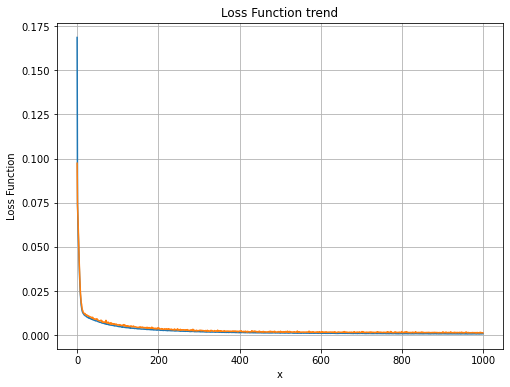

In [48]:
loss = history.history['loss']
val_loss = history.history['val_loss']
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(loss)
plt.plot(val_loss)
plt.grid('both')
plt.xlabel('x')
plt.ylabel('Loss Function')
plt.title('Loss Function trend')
plt.show()


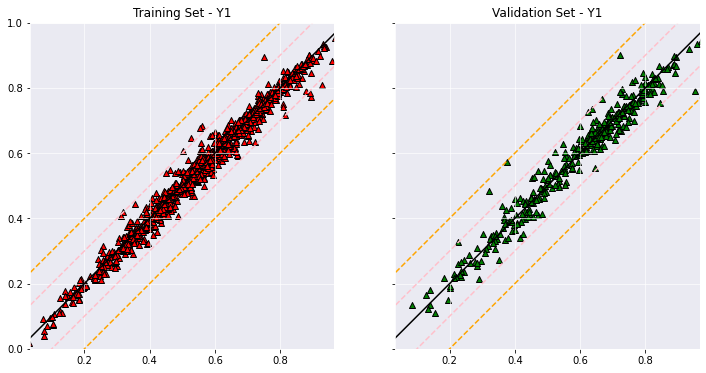

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
ax[0].axis('equal')
ax[0].scatter(train_labels[:, 0], model.predict(train_features)[:, 0], marker='^',
          color='r', edgecolor='k')
ax[0].plot([0, 1], [0, 1], c='k')
ax[0].plot([0, 1], [0.2, 1.2],'--', c='orange')
ax[0].plot([0, 1], [-0.2, 0.8],'--', c='orange')
ax[0].plot([0, 1], [0.1, 1.1],'--', c='pink')
ax[0].plot([0, 1], [-0.1, 0.9],'--', c='pink')
ax[0].set_title('Training Set - Y1')
ax[0].set_ylim(0, 1)
ax[0].grid(which='both', alpha=0.8, c='white')
ax[0].set_facecolor('#eaeaf2')
ax[0].spines['bottom'].set_color('white')
ax[0].spines['top'].set_color('white')
ax[0].spines['right'].set_color('white')
ax[0].spines['left'].set_color('white')

ax[1].axis('equal')
ax[1].scatter(test_labels[:, 0], model.predict(test_features)[:, 0], marker='^',
          color='g', edgecolor='k')
ax[1].plot([0, 1], [0, 1], c='k')
ax[1].plot([0, 1], [0.2, 1.2],'--', c='orange')
ax[1].plot([0, 1], [-0.2, 0.8],'--', c='orange')
ax[1].plot([0, 1], [0.1, 1.1],'--', c='pink')
ax[1].plot([0, 1], [-0.1, 0.9],'--', c='pink')
ax[1].set_title('Validation Set - Y1')
ax[1].set_ylim(0, 1)
ax[1].grid(which='both', alpha=0.8, c='white')
ax[1].set_facecolor('#eaeaf2')
ax[1].spines['bottom'].set_color('white')
ax[1].spines['top'].set_color('white')
ax[1].spines['right'].set_color('white')
ax[1].spines['left'].set_color('white')

In [50]:
import numpy as np
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
for i in range(np.shape(train_labels)[1]): 
  metrics= {
      'mae-train': np.mean(np.abs(train_labels[:, i] - model.predict(train_features)[:, i])),
      'mse-train': np.mean(np.square(train_labels[:, i] - model.predict(train_features)[:, i])),
      'r2-train': r2_score(train_labels[:, i], model.predict(train_features)[:, i]),
      'pearson-train': pearsonr(train_labels[:, i], model.predict(train_features)[:, i])[0],
      'mae-test': np.mean(np.abs(test_labels[:, i] - model.predict(test_features)[:, i])),
      'mse-test': np.mean(np.square(test_labels[:, i] - model.predict(test_features)[:, i])),
      'r2-test': r2_score(test_labels[:, i] ,model.predict(test_features)[:, i]),
      'pearson-test': pearsonr(test_labels[:, i], model.predict(test_features)[:, i])[0]
  }

  blue = lambda x: '\033[94m' + x + '\033[0m'
  yellow = lambda x: '\033[93m' + x + '\033[0m'

  for key in metrics:
      if 'train' in key:
          print(f'Y{i} - {blue(key)} - {str(metrics[key])[:7]}')
      else:
          print(f'Y{i} - {yellow(key)} - {str(metrics[key])[:7]}')

Y0 - mae-train - 0.01732
Y0 - mse-train - 0.00065
Y0 - r2-train - 0.98054
Y0 - pearson-train - 0.99038
Y0 - mae-test - 0.02458
Y0 - mse-test - 0.00128
Y0 - r2-test - 0.96151
Y0 - pearson-test - 0.98061


# Greetings
---

In [51]:
!pip install art
from art import tprint, aprint
tprint('See you on next videos!')
def subscribe():
  """
  Attractive subscription form
  """
  aprint("giveme", number=5)
  print(f'\n\tLike and subscribe to support this work!\n')
  aprint("giveme", number=5)
subscribe()

 ____                                                                        _            _      _                    _ 
/ ___|   ___   ___   _   _   ___   _   _    ___   _ __    _ __    ___ __  __| |_  __   __(_)  __| |  ___   ___   ___ | |
\___ \  / _ \ / _ \ | | | | / _ \ | | | |  / _ \ | '_ \  | '_ \  / _ \\ \/ /| __| \ \ / /| | / _` | / _ \ / _ \ / __|| |
 ___) ||  __/|  __/ | |_| || (_) || |_| | | (_) || | | | | | | ||  __/ >  < | |_   \ V / | || (_| ||  __/| (_) |\__ \|_|
|____/  \___| \___|  \__, | \___/  \__,_|  \___/ |_| |_| |_| |_| \___|/_/\_\ \__|   \_/  |_| \__,_| \___| \___/ |___/(_)
                     |___/                                                                                              

༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ 

	Like and subscribe to support this work!

༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ 
